In [12]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

In [13]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data.txt', names=cols)

In [15]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Picking columns with numeric values

In [17]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length','width', 'height', 'curb-weight','bore', 'stroke','compression-rate','horsepower','peak-rpm','city-mpg', 'highway-mpg', 'price']

In [18]:
filter_cars = cars[numeric_cols]

In [19]:
filter_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


### Replacing ? with Nan

In [21]:
filter_cars=filter_cars.replace("?",np.nan)

In [22]:
filter_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [23]:
filter_cars = filter_cars.astype(float)

### Checking for null values

In [24]:
filter_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Deleting rows with no price

In [25]:
filter_cars=filter_cars.dropna(subset=['price'])

In [26]:
filter_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [29]:
filter_cars = filter_cars.fillna(filter_cars.mean())

In [30]:
filter_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Normalize columns

In [34]:
norm_cars = (filter_cars - filter_cars.min())/(filter_cars.max() - filter_cars.min())

In [35]:
norm_cars['price'] = filter_cars['price']

In [36]:
norm_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### k-nearest neighbors model for one column with default k=5

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    #shuffeling dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #splitting to two sub-sets
    total_rows = len(rand_df)
    half_rows = int(total_rows/2)
    train = rand_df.iloc[:half_rows]
    test = rand_df.iloc[half_rows:]
    
    #training & testing
    knn = KNeighborsRegressor()
    knn.fit(train[[train_col]],train[target_col])
    predictions = knn.predict(test[[train_col]])
    MSE = mean_squared_error(test[target_col],predictions)
    RMSE = np.sqrt(MSE)
    return RMSE


### Checking for smallest RMSE in each column

In [69]:
target_col = 'price'
rmse_dict = {}
features = norm_cars.columns.tolist()
features.remove('price')
for f in features:
     rmse_dict[f] = knn_train_test(f, target_col, norm_cars)
RMSES = pd.Series(rmse_dict)
RMSES.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

### Manipulating model for different k

In [70]:
def knn_train_test_k(train_col, target_col, df):
    np.random.seed(1)
    #shuffeling dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #splitting to two sub-sets
    total_rows = len(rand_df)
    half_rows = int(total_rows/2)
    train = rand_df.iloc[:half_rows]
    test = rand_df.iloc[half_rows:]
    
    ks = [1,3,5,7,9]
    k_rmse = {}
    #training & testing
    for k in ks:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[train_col]],train[target_col])
        predictions = knn.predict(test[[train_col]])
        MSE = mean_squared_error(test[target_col],predictions)
        RMSE = np.sqrt(MSE)
        k_rmse[k] = RMSE
    return k_rmse

In [73]:
rmse_k_dict = {}
for f in features:
     rmse_k_dict[f] = knn_train_test_k(f, target_col, norm_cars)
rmse_k_dict

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

### Visualising RMSE for k = 1,3,5,7,9

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

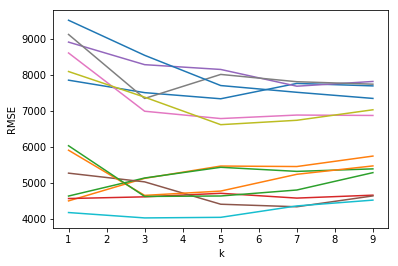

In [78]:
for cols, k_rmse in rmse_k_dict.items():
    plt.plot(k_rmse.keys(),k_rmse.values())
    plt.xlabel('k')
    plt.ylabel('RMSE')

### k-nearest neighbors model with multiple columns and k=5

In [79]:
def knn_train_test_multi_col(train_col, target_col, df):
    np.random.seed(1)
    #shuffeling dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #splitting to two sub-sets
    total_rows = len(rand_df)
    half_rows = int(total_rows/2)
    train = rand_df.iloc[:half_rows]
    test = rand_df.iloc[half_rows:]
    
    #training & testing
    knn = KNeighborsRegressor()
    knn.fit(train[train_col],train[target_col])
    predictions = knn.predict(test[train_col])
    MSE = mean_squared_error(test[target_col],predictions)
    RMSE = np.sqrt(MSE)
    return RMSE



### Checking RMSE for all features

In [84]:
rmse_multi_col = knn_train_test_multi_col(features, target_col, norm_cars)
rmse_multi_col

4163.854606177567

In [85]:
features

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

### Selecting 2-5 features and checking RMSE

In [94]:
rmse_dict_many_features = {}
f_2 = ['horsepower','curb-weight']
rmse_dict_many_features[2] = knn_train_test_multi_col(f_2, target_col, norm_cars)
f_3 = ['horsepower','curb-weight','highway-mpg']
rmse_dict_many_features[3] = knn_train_test_multi_col(f_3, target_col, norm_cars)
f_4 = ['horsepower','curb-weight','highway-mpg','width']
rmse_dict_many_features[4] = knn_train_test_multi_col(f_4, target_col, norm_cars)
f_5 = ['horsepower','curb-weight','highway-mpg','width','city-mpg']
rmse_dict_many_features[5] = knn_train_test_multi_col(f_5, target_col, norm_cars)
pd.Series(rmse_dict_many_features).sort_values()

2    3257.849049
5    3341.602454
4    3358.691580
3    3365.911000
dtype: float64

### Checking models for 3, 4 and 5 columns with k = 1,..,25

In [90]:
def knn_train_test_multi_col_k(train_col, target_col, df):
    np.random.seed(1)
    #shuffeling dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #splitting to two sub-sets
    total_rows = len(rand_df)
    half_rows = int(total_rows/2)
    train = rand_df.iloc[:half_rows]
    test = rand_df.iloc[half_rows:]
    
    #training & testing
    hyper_params = [x for x in range(1,26)]
    k_rmse = {}
    for k in hyper_params:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[train_col],train[target_col])
        predictions = knn.predict(test[train_col])
        MSE = mean_squared_error(test[target_col],predictions)
        k_rmse[k] = np.sqrt(MSE)
    return k_rmse

In [95]:
rmse_k_dict_features = {}
rmse_k_dict_features[2] = knn_train_test_multi_col_k(f_2, target_col, norm_cars)
rmse_k_dict_features[5] = knn_train_test_multi_col_k(f_5, target_col, norm_cars)
rmse_k_dict_features[4] = knn_train_test_multi_col_k(f_4, target_col, norm_cars)
rmse_k_dict_features

{2: {1: 2790.1071433346656,
  2: 2700.7472352504356,
  3: 3003.7488055243016,
  4: 3106.605625597663,
  5: 3257.849049435976,
  6: 3660.48709284375,
  7: 3776.622550248818,
  8: 3990.519746861657,
  9: 4106.695501428088,
  10: 4292.927729786319,
  11: 4446.49068863902,
  12: 4474.5040774983045,
  13: 4535.433105685562,
  14: 4557.787134869417,
  15: 4626.44623473615,
  16: 4616.715111529423,
  17: 4627.590528180833,
  18: 4591.404760116439,
  19: 4602.10047883103,
  20: 4609.448817726754,
  21: 4643.491685319764,
  22: 4652.902519818285,
  23: 4697.632838416021,
  24: 4738.027378987156,
  25: 4760.49488106037},
 5: {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.520542998191,
  7: 3817.290452118825,
  8: 4004.414529685573,
  9: 3992.3186041830318,
  10: 4138.728787853335,
  11: 4342.052852829098,
  12: 4416.145381031136,
  13: 4493.8798141857205,
  14: 4463.501601554571,
  15: 4474.480783207805,
  16:

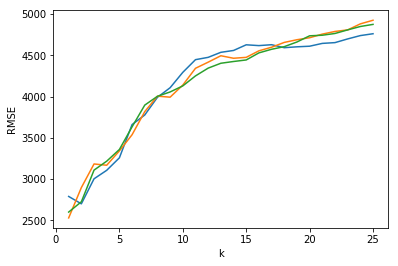

In [96]:
for cols, k_rmse in rmse_k_dict_features.items():
    plt.plot(k_rmse.keys(),k_rmse.values())
    plt.xlabel('k')
    plt.ylabel('RMSE')